<a href="https://colab.research.google.com/github/pacayton/DS_397_Interpretable_ML/blob/main/Notebooks/R_Notebooks/Interpretable_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Codes for Interpretable Machine Learning

Preamble Code

In [ ]:
## Work saved in Notebooks/R_Notebooks/Interpretable_Models.ipynb.

## Preamble Code

## Bike-Sharing Data
### file path: https://github.com/pacayton/DS_397_Interpretable_ML/raw/main/Datasets/Bike_Sharing/day.csv

## Load Packages

library(tidyverse)
library(lubridate)
# install.packages("stargazer")
library(stargazer)
# install.packages("broom")
library(broom)



Data Processing

In [ ]:

### Process Bike Data

bike = read.csv("https://github.com/pacayton/DS_397_Interpretable_ML/raw/main/Datasets/Bike_Sharing/day.csv", stringsAsFactors = FALSE)

bike$weekday = factor(bike$weekday, levels=0:6, labels = c('SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'))
bike$holiday = factor(bike$holiday, levels = c(0,1), labels = c('NO HOLIDAY', 'HOLIDAY'))
bike$workingday = factor(bike$workingday, levels = c(0,1), labels = c('NO WORKING DAY', 'WORKING DAY'))
bike$season = factor(bike$season, levels = 1:4, labels = c('WINTER', 'SPRING', 'SUMMER', 'FALL'))
bike$weathersit = factor(bike$weathersit, levels = 1:3, labels = c('GOOD', 'MISTY', 'RAIN/SNOW/STORM'))
bike$mnth = factor(bike$mnth, levels = 1:12, labels = c('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'))
bike$yr[bike$yr == 0] = 2011
bike$yr[bike$yr == 1] = 2012
bike$yr = factor(bike$yr)
bike$days_since_2011 = as.numeric(as.Date(bike$dteday)- min(as.Date(bike$dteday)))

# denormalize weather features:
# temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
bike$temp = bike$temp * (39 - (-8)) + (-8)
# atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
bike$atemp = bike$atemp * (50 - (16)) + (16)

#windspeed: Normalized wind speed. The values are divided to 67 (max)
bike$windspeed = 67 * bike$windspeed
#hum: Normalized humidity. The values are divided to 100 (max)
bike$hum = 100 * bike$hum

bike <- dplyr::select(bike, -instant, -dteday, -registered, -casual, -atemp)

bike.features.of.interest = c('season','holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'days_since_2011')

Simple Data View

In [ ]:
View(bike)

season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4
WINTER,2011,JAN,NO HOLIDAY,THU,WORKING DAY,GOOD,1.604356,51.8261,6.000868,1606,5
WINTER,2011,JAN,NO HOLIDAY,FRI,WORKING DAY,MISTY,1.236534,49.8696,11.304642,1510,6
WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,-0.245000,53.5833,17.875868,959,7
WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,GOOD,-1.498349,43.4167,24.250650,822,8


## Linear Regression

Sample Run of Linear Regression

In [ ]:
lr_model <- lm(cnt ~ season + holiday + workingday + weathersit + temp + hum + windspeed + days_since_2011, data = bike)

stargazer(lr_model, type = "text")

summary(lr_model)


                              Dependent variable:    
                          ---------------------------
                                      cnt            
-----------------------------------------------------
seasonSPRING                      899.318***         
                                   (122.283)         
                                                     
seasonSUMMER                        138.215          
                                   (161.704)         
                                                     
seasonFALL                        425.603***         
                                   (110.820)         
                                                     
holidayHOLIDAY                    -686.115***        
                                   (203.301)         
                                                     
workingdayWORKING DAY              124.921*          
                                   (73.267)          
                           


Call:
lm(formula = cnt ~ season + holiday + workingday + weathersit + 
    temp + hum + windspeed + days_since_2011, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-3509.6  -397.9    78.7   534.1  3482.4 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2399.4422   238.3066  10.069  < 2e-16 ***
seasonSPRING                899.3182   122.2833   7.354 5.24e-13 ***
seasonSUMMER                138.2154   161.7037   0.855 0.392977    
seasonFALL                  425.6029   110.8199   3.840 0.000134 ***
holidayHOLIDAY             -686.1154   203.3015  -3.375 0.000778 ***
workingdayWORKING DAY       124.9209    73.2666   1.705 0.088623 .  
weathersitMISTY            -379.3985    87.5532  -4.333 1.68e-05 ***
weathersitRAIN/SNOW/STORM -1901.5399   223.6400  -8.503  < 2e-16 ***
temp                        110.7096     7.0433  15.718  < 2e-16 ***
hum                         -17.3772     3.1694  -5.483 5.80e-08 ***
w

A Coefficient Plot

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2399.442211,238.306592,10.0687194,2.133415e-22,1931.582301,2867.302121
seasonSPRING,899.318156,122.283253,7.3543853,5.239188e-13,659.243253,1139.393059
seasonSUMMER,138.215432,161.703690,0.8547451,3.929770e-01,-179.252386,455.683251
seasonFALL,425.602853,110.819879,3.8404919,1.336217e-04,208.033635,643.172070
holidayHOLIDAY,-686.115442,203.301472,-3.3748671,7.781617e-04,-1085.250890,-286.979993
workingdayWORKING DAY,124.920938,73.266572,1.7050196,8.862274e-02,-18.921040,268.762917
weathersitMISTY,-379.398530,87.553162,-4.3333504,1.677742e-05,-551.288925,-207.508134
weathersitRAIN/SNOW/STORM,-1901.539915,223.639973,-8.5026835,1.067801e-16,-2340.605309,-1462.474521
temp,110.709582,7.043267,15.7184978,4.477534e-48,96.881754,124.537409


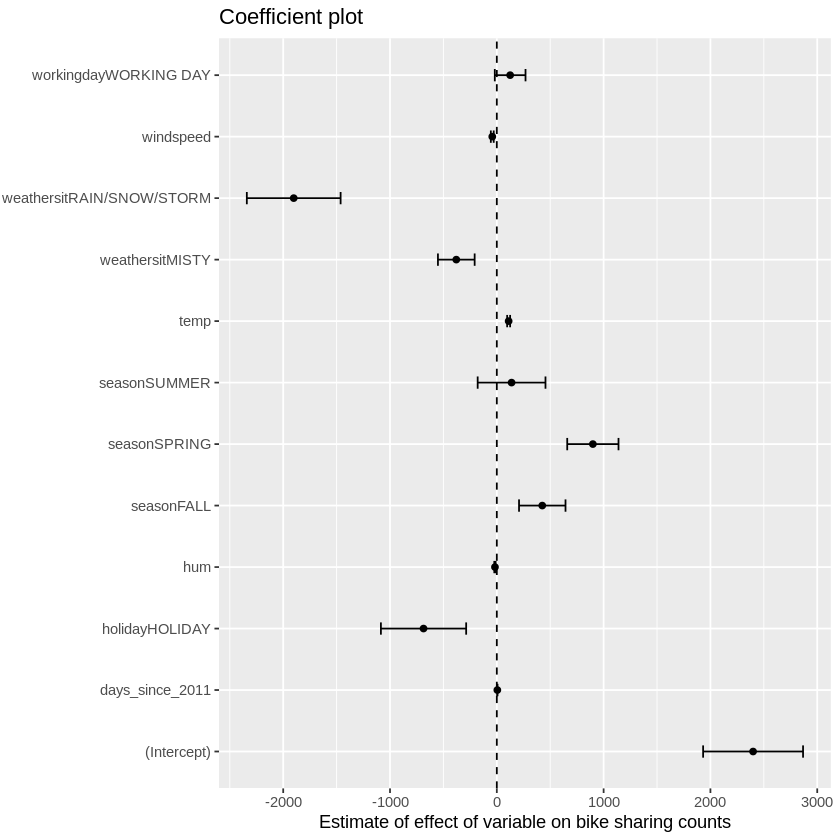

In [ ]:
( tidy_lreg <- lr_model %>% tidy(conf.int = TRUE) )

tidy_lreg %>% ggplot(aes(estimate, term)) +
  geom_point() +
  geom_errorbarh(aes(xmin = conf.low, xmax = conf.high, height = 0.2)) +
  # add in a dotted line at zero
  geom_vline(xintercept = 0, lty = 2) +
  labs(
    x = "Estimate of effect of variable on bike sharing counts",
    y = NULL,
    title = "Coefficient plot"
  )

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2399.442211,238.306592,10.0687194,2.133415e-22,1931.582301,2867.302121
seasonSPRING,899.318156,122.283253,7.3543853,5.239188e-13,659.243253,1139.393059
seasonSUMMER,138.215432,161.703690,0.8547451,3.929770e-01,-179.252386,455.683251
seasonFALL,425.602853,110.819879,3.8404919,1.336217e-04,208.033635,643.172070
holidayHOLIDAY,-686.115442,203.301472,-3.3748671,7.781617e-04,-1085.250890,-286.979993
workingdayWORKING DAY,124.920938,73.266572,1.7050196,8.862274e-02,-18.921040,268.762917
weathersitMISTY,-379.398530,87.553162,-4.3333504,1.677742e-05,-551.288925,-207.508134
weathersitRAIN/SNOW/STORM,-1901.539915,223.639973,-8.5026835,1.067801e-16,-2340.605309,-1462.474521
temp,110.709582,7.043267,15.7184978,4.477534e-48,96.881754,124.537409


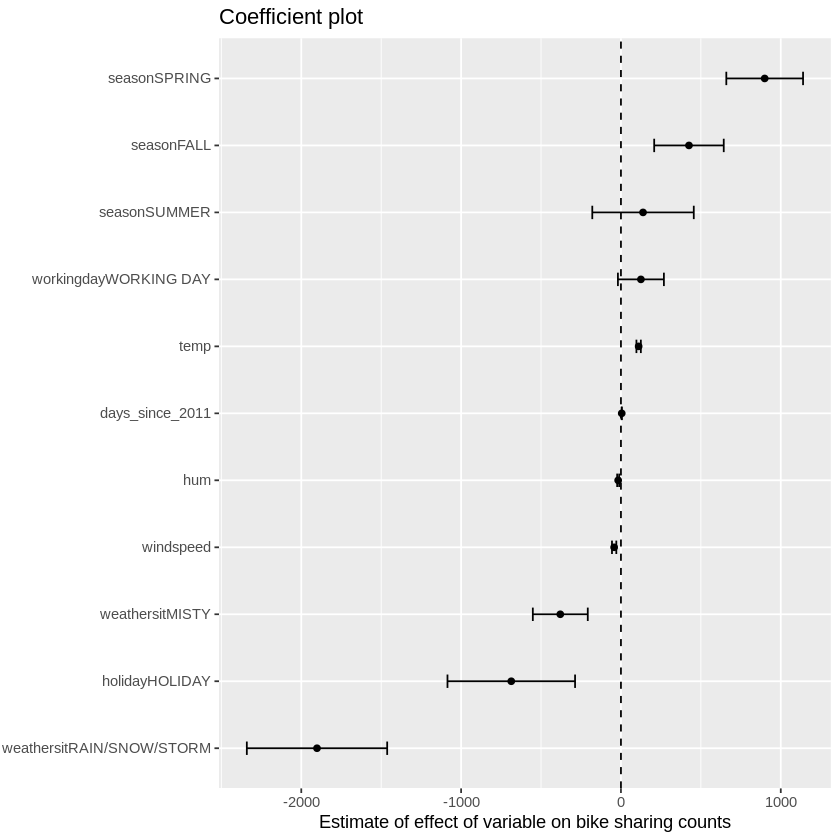

In [ ]:
( tidy_lreg <- lr_model %>% tidy(conf.int = TRUE) )

tidy_lreg %>%
  filter(term != "(Intercept)") %>%
  # reorder the coefficients so that the largest is at the top of the plot
  mutate(term = fct_reorder(term, estimate)) %>%
    ggplot(aes(estimate, term)) +
      geom_point() +
      geom_errorbarh(aes(xmin = conf.low, xmax = conf.high, height = 0.2)) +
      # add in a dotted line at zero
    geom_vline(xintercept = 0, lty = 2) +
      labs(
      x = "Estimate of effect of variable on bike sharing counts",
      y = NULL,
      title = "Coefficient plot"
      )

Regression with Standardized Coefficients and Coefficient Plots

In [ ]:
sdlr_model <- lm(scale(cnt) ~ season + holiday + workingday + weathersit + scale(temp) + scale(hum) + scale(windspeed) + scale(days_since_2011), data = bike)

stargazer(sdlr_model, type = "text")


                              Dependent variable:    
                          ---------------------------
                                  scale(cnt)         
-----------------------------------------------------
seasonSPRING                       0.464***          
                                    (0.063)          
                                                     
seasonSUMMER                         0.071           
                                    (0.083)          
                                                     
seasonFALL                         0.220***          
                                    (0.057)          
                                                     
holidayHOLIDAY                     -0.354***         
                                    (0.105)          
                                                     
workingdayWORKING DAY               0.064*           
                                    (0.038)          
                           

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.12825677,0.05724770,-2.2403830,2.537073e-02,-0.240649402,-0.01586415
seasonSPRING,0.46423335,0.06312334,7.3543853,5.239188e-13,0.340305263,0.58816143
seasonSUMMER,0.07134762,0.08347240,0.8547451,3.929770e-01,-0.092531141,0.23522639
seasonFALL,0.21969871,0.05720588,3.8404919,1.336217e-04,0.107388192,0.33200922
holidayHOLIDAY,-0.35417685,0.10494542,-3.3748671,7.781617e-04,-0.560212923,-0.14814077
workingdayWORKING DAY,0.06448493,0.03782064,1.7050196,8.862274e-02,-0.009767153,0.13873701
weathersitMISTY,-0.19584776,0.04519546,-4.3333504,1.677742e-05,-0.284578601,-0.10711693
weathersitRAIN/SNOW/STORM,-0.98158614,0.11544428,-8.5026835,1.067801e-16,-1.208234293,-0.75493799
scale(temp),0.49167501,0.03128003,15.7184978,4.477534e-48,0.430263911,0.55308611


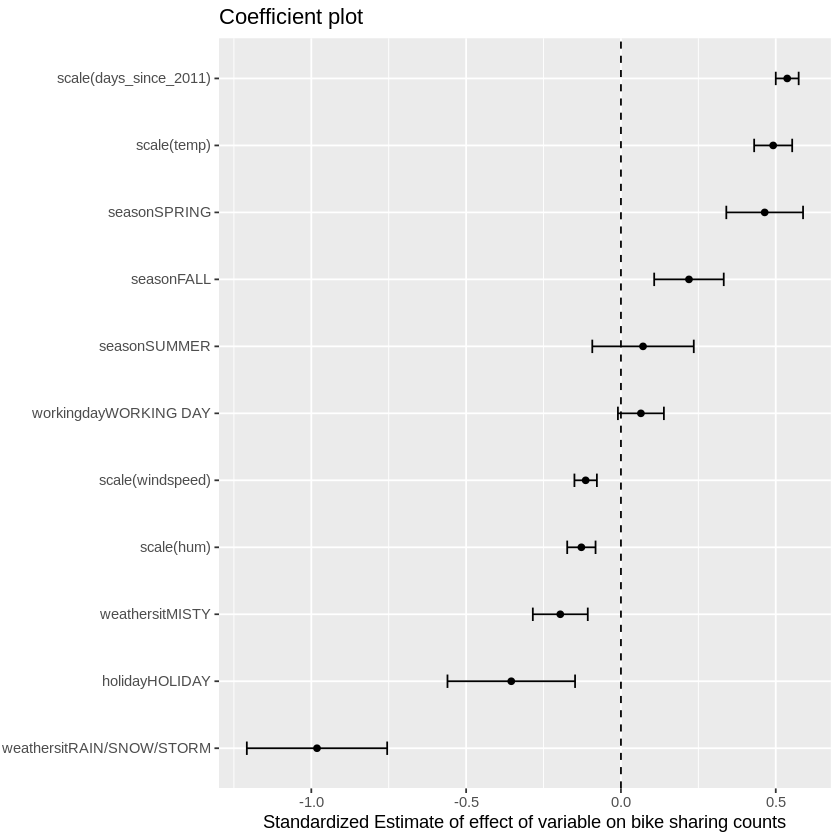

In [ ]:
( tidy_sdlreg <- sdlr_model %>% tidy(conf.int = TRUE) )

tidy_sdlreg %>%
  filter(term != "(Intercept)") %>%
  # reorder the coefficients so that the largest is at the top of the plot
  mutate(term = fct_reorder(term, estimate)) %>%
    ggplot(aes(estimate, term)) +
      geom_point() +
      geom_errorbarh(aes(xmin = conf.low, xmax = conf.high, height = 0.2)) +
      # add in a dotted line at zero
    geom_vline(xintercept = 0, lty = 2) +
      labs(
      x = "Standardized Estimate of effect of variable on bike sharing counts",
      y = NULL,
      title = "Coefficient plot"
      )

Effect Plots

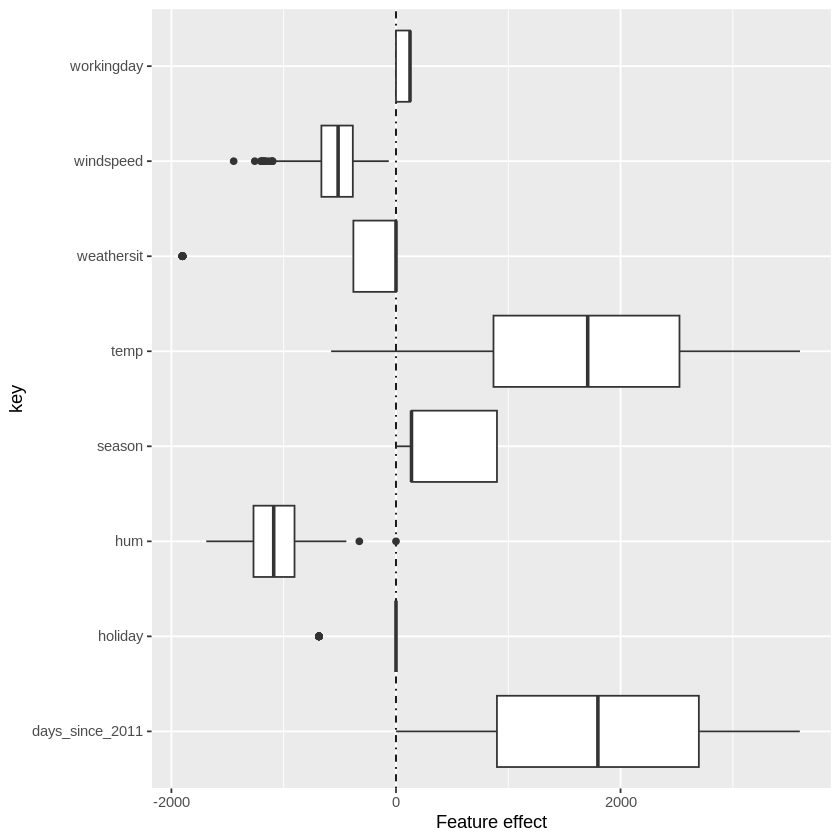

In [ ]:
effect_plot = function(mod, dat,  feature_names=NULL){
  X = get_effects(mod, dat)
  if(!missing(feature_names)){
    rownames(X) = feature_names
  }
  X = tidyr::gather(X)
  require("ggplot2")
  ggplot(X) +
    geom_hline(yintercept=0, linetype=4) +
    geom_boxplot(aes(x=key, y=value, group=key)) +
    coord_flip() +
    scale_y_continuous('Feature effect')
}

get_reference_dataset = function(dat){
  df = lapply(dat, function(feature){
    if(class(feature) == 'factor'){
      factor(levels(feature)[1], levels = levels(feature))
    } else {
      0
    }
  })
  data.frame(df)
}

get_effects = function(mod, dat){

  X = data.frame(predict(mod, type = 'terms'))

  # Nicer colnames
  colnames(X) = gsub('^X\\.', '', colnames(X))
  colnames(X) = gsub('\\.', ' ', colnames(X))

  # predict with type='terms' centers the results, so we have to add the mean again
  reference_X = predict(mod, newdata=get_reference_dataset(dat), type='terms')
  X_star = data.frame(t(apply(X, 1, function(x){ x - reference_X[1,names(X)]})))
  X_star
}

effect_plot(mod = lr_model, dat = bike)

Effect for a Specfic Point

In [ ]:
i = 6
effects = get_effects(lr_model, bike)
predictions = predict(lr_model)

effects_i = tidyr::gather(effects[i, ])
predictions_mean = mean(predictions)
# For proper indexing, names have to be removed
names(predictions) = NULL
pred_i = predictions[i]

df = data.frame(feature = colnames(bike), value = t(bike[i,]))
colnames(df) = c("feature", "value")

View(df)

,feature,value
,<chr>,<chr>
season,season,WINTER
yr,yr,2011
mnth,mnth,JAN
holiday,holiday,NO HOLIDAY
weekday,weekday,THU
workingday,workingday,WORKING DAY
weathersit,weathersit,GOOD
temp,temp,1.604356
hum,hum,51.8261


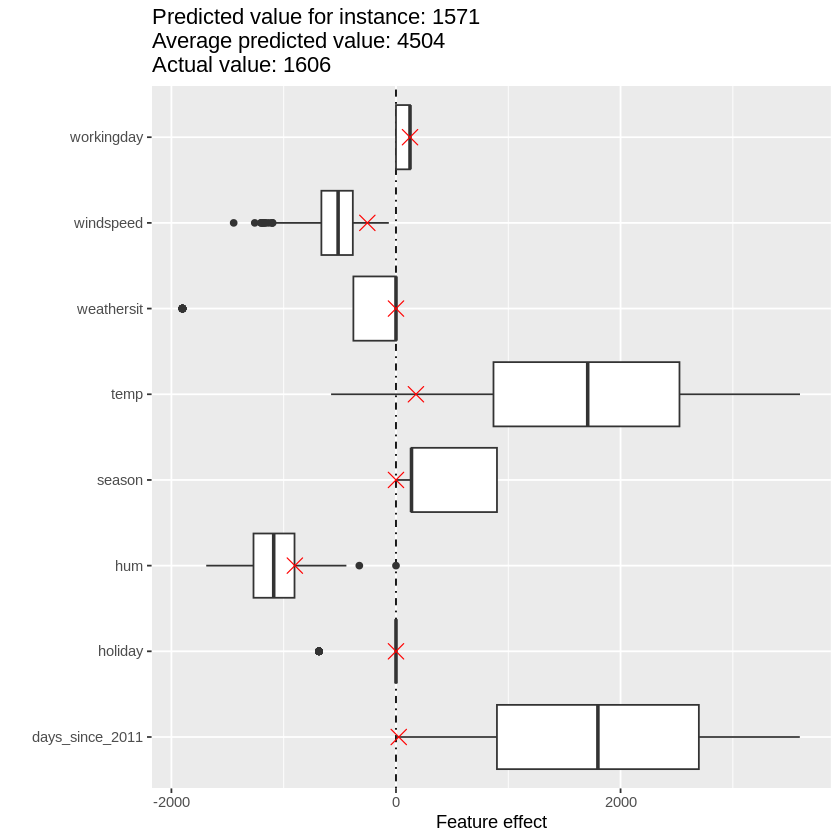

In [ ]:
effect_plot(mod = lr_model, dat = bike) +
  geom_point(aes(x=key, y=value), color = 'red', data = effects_i, shape = 4, size=4) +
  scale_x_discrete("") +
  ggtitle(sprintf('Predicted value for instance: %.0f\nAverage predicted value: %.0f\nActual value: %.0f', pred_i, predictions_mean, bike$cnt[i]))